In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import numpy as np

In [96]:
df_motion = pd.read_csv(path.join('data','5_slow.csv'))
df_sensor = pd.read_csv(path.join('data', '5s_slow.csv'))

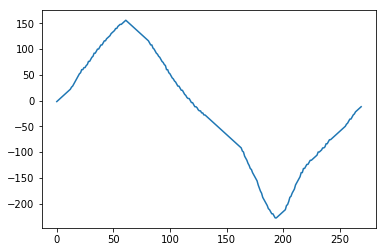

In [97]:
plt.plot(df_sensor.Angle)

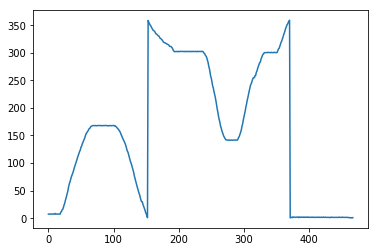

In [98]:
plt.plot( (df_motion.theta*-1) + 360 )

In [110]:
theta = df_motion.theta[20:380]
t = df_motion.t[20:380]
theta = theta*-1 + 360
theta = np.where(theta > 180, theta - 360, theta)

In [111]:
theta_s = df_sensor.Angle
theta_s = np.where(theta_s < -180, theta_s + 360, theta_s)

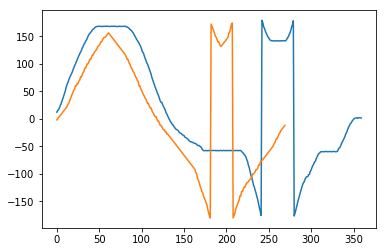

In [112]:
x = np.arange(len(theta))
xs = np.arange(len(theta_s))
plt.plot(x, theta, xs, theta_s)

In [113]:
df_sensor.columns

Index(['Counts', 'Angle'], dtype='object')

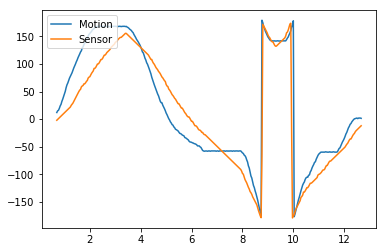

In [114]:
import scipy.interpolate as interp

arr_ref = theta
arr2 = theta_s      # shape (5,), to "stretch"
arr2_interp = interp.interp1d(np.arange(arr2.size),arr2)
arr2_stretch = arr2_interp(np.linspace(0,arr2.size-1,arr_ref.size))

x = np.arange(len(theta))
xs = np.arange(len(arr2_stretch))
plt.plot(t, theta, label="Motion")
plt.plot(t, arr2_stretch, label="Sensor")
plt.legend(loc='upper left')